In [9]:
# a. Import Libraries
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [10]:
# # b. Load Dataset
# df = pd.read_csv("creditcard.csv").drop('Time', axis=1)
# X = StandardScaler().fit_transform(df.drop('Class', axis=1))
# y = df['Class']
# x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# x_train = x_train[y_train == 0]    # only normal data
# Load dataset
df = pd.read_csv("creditcard.csv")

# Drop only 'Time' column
df = df.drop(['Time'], axis=1)

# Separate features and labels
X = df.drop(['Class'], axis=1)
y = df['Class']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train only on normal (non-fraud) data
x_train = x_train[y_train == 0]

In [11]:
# c. Encoder (latent space)
encoder = Sequential([
   Dense(16, activation='relu', input_shape=(x_train.shape[1],))
])


In [12]:
# d. Decoder (reconstruction)
decoder =Sequential([
    Dense(x_train.shape[1], activation='linear', input_shape=(16,))
])
autoencoder = tf.keras.Sequential([encoder, decoder])

In [13]:

# e. Compile + Train
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(x_train, x_train, epochs=10, batch_size=128, verbose=0)


In [14]:
# Anomaly Detection
pred = autoencoder.predict(x_test, verbose=0)
mse = np.mean((x_test - pred)**2, axis=1)
threshold = np.percentile(mse, 95)
anomalies = mse > threshold

# Evaluation
print(confusion_matrix(y_test, anomalies))
print(classification_report(y_test, anomalies))

[[54103  2761]
 [   10    88]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.98     56864
           1       0.03      0.90      0.06        98

    accuracy                           0.95     56962
   macro avg       0.52      0.92      0.52     56962
weighted avg       1.00      0.95      0.97     56962



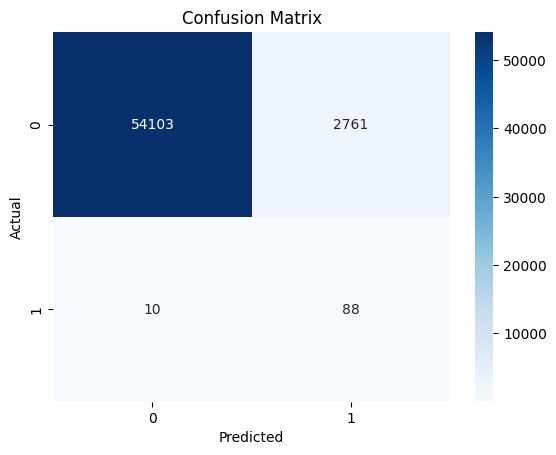

              precision    recall  f1-score   support

           0       1.00      0.95      0.98     56864
           1       0.03      0.90      0.06        98

    accuracy                           0.95     56962
   macro avg       0.52      0.92      0.52     56962
weighted avg       1.00      0.95      0.97     56962



In [15]:
cm = confusion_matrix(y_test, anomalies)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_test, anomalies))

In [16]:
| Actual         | Predicted Normal | Predicted Fraud | Meaning                                   |
| -------------- | ---------------- | --------------- | ----------------------------------------- |
| **0 (Normal)** | 54102            | 2755            | False Positives (normal → fraud)          |
| **1 (Fraud)**  | 11               | 94              | True Positives (fraud correctly detected) |


SyntaxError: invalid character '→' (U+2192) (4197630743.py, line 3)

In [ ]:
*“After applying a threshold on reconstruction error, the Autoencoder predicted anomalies.

54,102 normal transactions were correctly reconstructed as normal.

2,755 normal transactions were incorrectly marked as anomalies (false positives), which is expected because autoencoders are sensitive and detect anything that looks unusual.

94 fraud transactions were correctly identified as anomalies.

Only 11 fraud cases were missed.”*"

In [ ]:
“My output is correct because autoencoders detect anomalies using reconstruction error, and the confusion matrix + metrics show typical behavior: high recall for fraud and some false positives, which is expected.”